#### Define Outlier Points with Plot

In [122]:
## first import packages
from __future__ import print_function
import patsy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import QuantileRegressor
import plyer
solver = "highs"

In [ ]:
## help codes 1
from sklearn.linear_model import QuantileRegressor

quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
    y_pred = qr.fit(X, y_normal).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_normal
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_normal
        )

In [119]:
## generate data
seed = 1234
n = 20
Error = stats.norm.rvs(0, .5, n, random_state = seed)
Error2 = np.delete(Error, n-1)
x1 = stats.uniform.rvs(-2, 4, n-1, random_state = seed)
x1 = np.append(x1, 6)
x2 = stats.uniform.rvs(-2, 5, n-1, random_state = seed)
xx2 = np.append(x2, 4.5)
xxx2 = np.linspace(-2, 4.5, 1000)
x3 = stats.uniform.rvs(-2.5, 5, n, random_state = seed)
xxx3 = np.linspace(-2.5, 2.5, 1000)
x3[9] = 0
y1 = 4 * x1 + 1 + Error
y2 = 2.5 * x2 + 2.5 
y21 = y2 + Error2
yy22 = np.append(y2, 50) + Error
y3 = 2.5 * x3 + 2.5 + Error
y3[9] = 40


In [120]:
## implement regression model 
l_reg = LinearRegression(fit_intercept=True)
X1 = x1[:, np.newaxis]
md1 = l_reg.fit(X1, y1)
yhat1 = md1.predict(X1)
X21 = x2[:, np.newaxis]
X22 = xx2[:, np.newaxis]
md21 = l_reg.fit(X21, y21)
b21 = md21.coef_
b21 = b21[0]
a21 = md21.intercept_
yhat21 = b21 * xxx2 + a21
md22 = l_reg.fit(X22, yy22)
b22 = md21.coef_
b22 = b22[0]
a22 = md22.intercept_
yhat22 = b22 * xxx2 + a22

x31 = np.delete(x3, 9)
X31 = x31[:, np.newaxis]
y31 = np.delete(y3, 9)
md31 = l_reg.fit(X31, y31)
b31 = md31.coef_
b31 = b31[0]
a31 = md31.intercept_
yhat31 = b31 * xxx3 + a31

X32 = x3[:, np.newaxis]
md32 = l_reg.fit(X32, y3)
b32 = md32.coef_
b32 = b32[0]
a32 = md32.intercept_
yhat32 = b32 * xxx3 + a32


In [106]:
a21

2.681032152171775

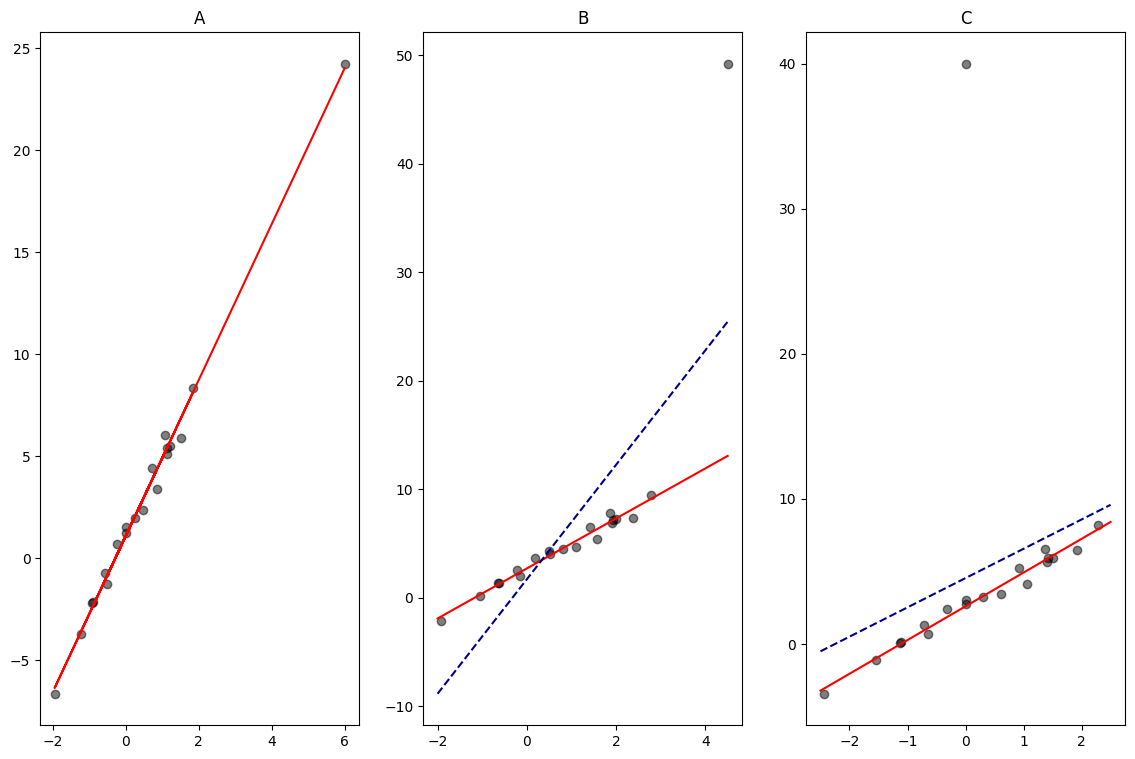

In [121]:
## plot graphs for scatter and linear regression
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 9))
ax1.scatter(x1, y1, color = "black", alpha = 0.5, 
            label = "Observation")
ax1.plot(x1, yhat1, color = "red", label = "regression line")
ax2.scatter(xx2, yy22, color = "black", alpha = 0.5, 
            label = "observation")
ax2.plot(xxx2, yhat21, color = "red", 
         label = "regression line without outlier point")
ax2.plot(xxx2, yhat22, color = "darkblue", linestyle = "dashed")
ax3.scatter(x3, y3, color = "black", alpha = 0.5, 
            label = "observation")
ax3.plot(xxx3, yhat31, color = "red")
ax3.plot(xxx3, yhat32, color = "darkblue", linestyle = "dashed")
ax1.set_title("A")
ax2.set_title("B")
ax3.set_title("C")
plt.show()

In [123]:
pathh = plyer.filechooser.open_file()[0]


In [124]:
dat = pd.read_excel(pathh)
dat.describe()

,curb_weight,num_of_cylinders,engine_size,price
count,201.000000,201.000000,201.000000,201.000000
mean,2555.666667,4.363184,126.875622,13207.129353
std,517.296727,1.059452,41.546834,7947.066342
min,1488.000000,2.000000,61.000000,5118.000000
25%,2169.000000,4.000000,98.000000,7775.000000
50%,2414.000000,4.000000,120.000000,10295.000000
75%,2926.000000,4.000000,141.000000,16500.000000
max,4066.000000,12.000000,326.000000,45400.000000


array([ 4.71435164e-01, -1.19097569e+00,  1.43270697e+00, -3.12651896e-01,
       -7.20588733e-01,  8.87162940e-01,  8.59588414e-01, -6.36523504e-01,
        1.56963721e-02, -2.24268495e+00,  1.15003572e+00,  9.91946022e-01,
        9.53324128e-01, -2.02125482e+00, -3.34077366e-01,  2.11836468e-03,
        4.05453412e-01,  2.89091941e-01,  1.32115819e+00, -1.54690555e+00])

In [36]:
y3

array([-1.12028929,  3.43087179,  2.43795022,  5.91065635,  5.63940323,
        0.10098904,  0.1355974 ,  5.95514047,  8.23459011,  6.07781546,
       40.        ,  3.00841208,  5.26994875,  4.14814793,  0.71109575,
        3.26601151,  2.74126627, -3.43334841,  6.57091187,  6.50956211])